In [1]:
import gempy as gp
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from geometron.geometries import gdf_to_points_gdf
# Setting options
np.random.seed(1515)
pd.set_option('precision', 2)

Not subsurface compatibility available


/home/su530201/.local/share/virtualenvs/gsdma_2021-CLBGPK-k/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
gdf = gpd.read_file('../../../../data/Parties exploitées - Caillette.gpkg', layer = 'Parties exploitées - Caillette')

In [3]:
gdf.rename({'Couche ': 'layer'}, axis=1, inplace=True)

In [4]:
gdf = gdf.query('layer=="10 Paumes" or layer=="Caillette"')

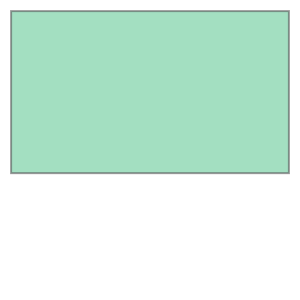

In [5]:
from shapely.geometry import Polygon
aoi = Polygon([[153400, 122500], [156400, 122500], [156400, 124250], [153400, 124250], [153400, 122500]])
aoi

In [6]:
gdf = gpd.clip(gdf, aoi, True) 

<AxesSubplot:>

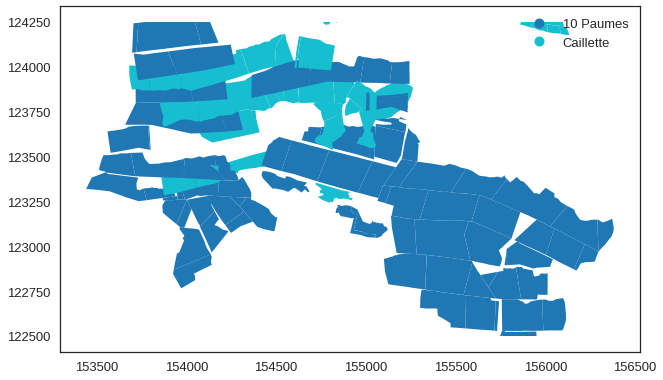

In [7]:
gdf.plot(column='layer', legend=True)

In [8]:
gdf['geometry'] = gdf['geometry'].apply(lambda geom: geom.simplify(10))

<AxesSubplot:>

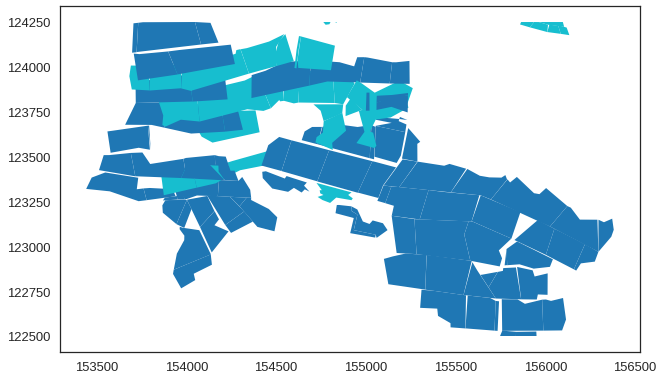

In [9]:
gdf.plot(column='layer')

In [10]:
gdf_points = gdf_to_points_gdf(gdf, columns=['layer'])
gdf_points.tail()

,geometry,layer
796,POINT Z (156105.420 124223.220 -509.300),Caillette
797,POINT Z (156015.589 124234.855 -509.950),Caillette
798,POINT Z (155962.909 124250.000 -509.893),Caillette
799,POINT Z (156098.197 124250.000 -495.015),Caillette
800,POINT Z (156105.420 124223.220 -509.300),Caillette


In [11]:
gdf_points = gdf_points

In [12]:
gdf.to_csv('Parties exploitées - Caillette.csv')

In [13]:
geo_model = gp.create_model('Parties exploitées - Caillette')
geo_model = gp.init_data(geo_model, extent=[gdf_points.bounds.minx.min(), gdf_points.bounds.maxx.max(), gdf_points.bounds.miny.min(),  gdf_points.bounds.maxy.max(), gdf_points.geometry.z.min(), gdf_points.geometry.z.max()], resolution=[100, 100, 40])

Active grids: ['regular']


In [14]:
gp.set_interpolator(geo_model, theano_optimizer='fast_compile', verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                     values
range              3452.04
$C_o$            283728.16
drift equations        [3]


In [15]:
geo_model.add_surfaces(['Caillette', '10 Paumes','basement'])

,surface,series,order_surfaces,color,id
0,Caillette,Default series,1,#015482,1
1,10 Paumes,Default series,2,#9f0052,2
2,basement,Default series,3,#ffbe00,3


In [16]:
for idx, row in gdf_points.iterrows():
    geo_model.add_surface_points(row.geometry.x, row.geometry.y,row.geometry.z, surface=row.layer)

In [17]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Caillette,Default series,1,#015482,1
1,10 Paumes,Default series,2,#9f0052,2
2,basement,Default series,3,#ffbe00,3


In [18]:
for idx, row in gdf_points.iterrows():
    geo_model.add_orientations(row.geometry.x, row.geometry.y,row.geometry.z, surface=row.layer, pole_vector=(0, 0, 1))

In [19]:
geo_model.orientations

,X,Y,Z,G_x,G_y,G_z,smooth,surface
18,154725.03,123353.22,-713.00,0.0,0.0,1.0,0.01,Caillette
19,154920.55,123300.40,-703.00,0.0,0.0,1.0,0.01,Caillette
20,154901.67,123286.30,-705.00,0.0,0.0,1.0,0.01,Caillette
21,154927.30,123267.17,-707.00,0.0,0.0,1.0,0.01,Caillette
22,154920.19,123256.90,-710.00,0.0,0.0,1.0,0.01,Caillette
23,154835.16,123271.69,-711.00,0.0,0.0,1.0,0.01,Caillette
24,154800.92,123241.72,-715.00,0.0,0.0,1.0,0.01,Caillette
25,154758.67,123257.79,-715.00,0.0,0.0,1.0,0.01,Caillette
26,154731.61,123275.06,-715.00,0.0,0.0,1.0,0.01,Caillette
27,154763.75,123285.94,-715.50,0.0,0.0,1.0,0.01,Caillette


In [20]:
gp.compute_model(geo_model)


Lithology ids 
  [3. 3. 3. ... 1. 1. 1.] 

In [27]:
gp._plot.export_to_vtk(geo_model, 'Caillette-10_Paumes')

True